In [13]:
from PIL import Image
from pathlib import Path
import concurrent.futures
import numpy as np

DIRS = [
    Path(
        "/workspaces/cv/data/inferences/20240815_060150-yolov9-c-20240815-maui/640x640_0.2x0.2/0.01/action-aviation-multicamera/20250331_west_coast_4camera_test"
    ),
    Path(
        "/workspaces/cv/data/inferences/20240815_060150-yolov9-c-20240815-maui/640x640_0.2x0.2/0.01/action-aviation-multicamera/20250405_west_coast_4camera"
    ),
]
results = {}
for d in DIRS:
    assert d.exists()
    res = []

    def do(fpath):
        img = Image.open(fpath)
        brightness = np.array(img.crop((0, 0, 200, 200))).mean()
        res.append({"brightness": brightness, "path": fpath})

    with concurrent.futures.ThreadPoolExecutor(max_workers=32) as executor:
        futures = [executor.submit(do, fpath) for fpath in d.rglob("*.jpg")]
        for idx, future in enumerate(concurrent.futures.as_completed(futures)):
            if idx % 100 == 0:
                print(f"Processed {idx} files", end="\r")
            try:
                future.result()
            except Exception as e:
                print(f"Error processing file: {e}", end="\r")
    results[d] = res

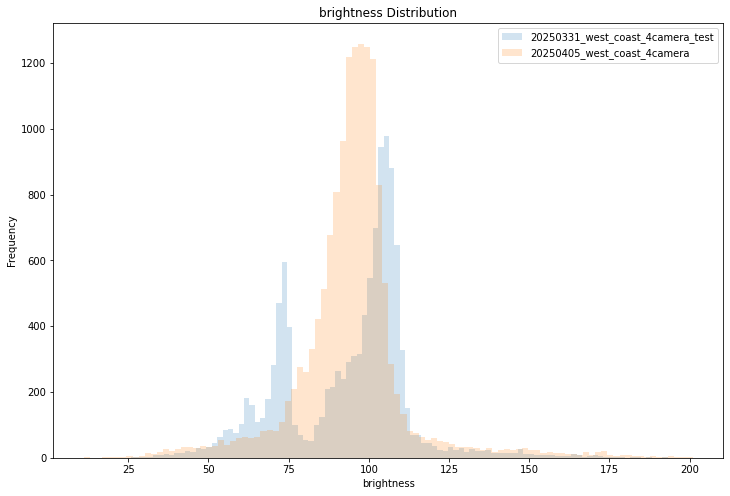

In [15]:
import matplotlib.pyplot as plt

# ISO:
for metric in ["brightness"]:
    plt.figure(figsize=(12, 8))
    for d in results:
        name = d.name
        vals = [r[metric] for r in results[d]]
        plt.hist(vals, bins=100, alpha=0.2, label=name)
    plt.title(f"{metric} Distribution")
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

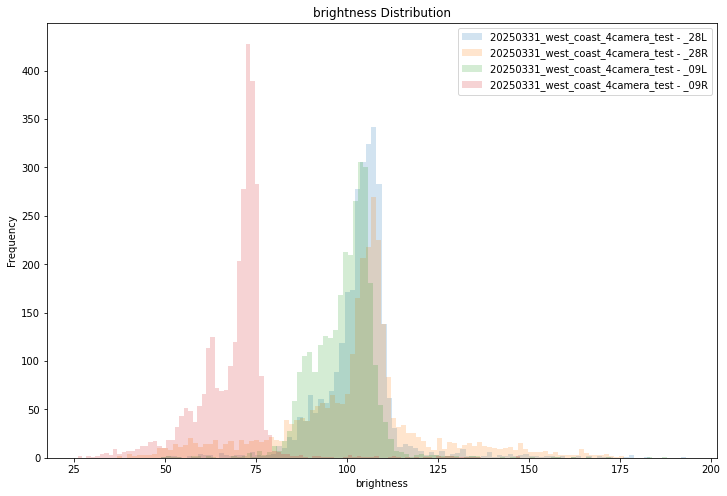

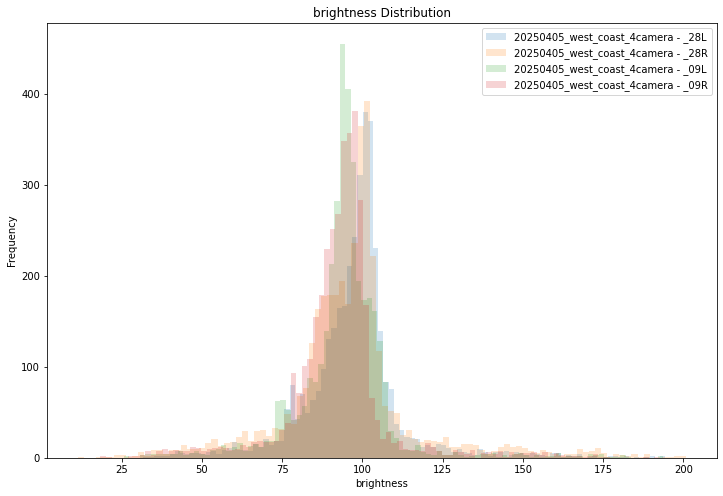

In [16]:
import matplotlib.pyplot as plt

# ISO:
for metric in ["brightness"]:
    for d in results:
        plt.figure(figsize=(12, 8))
        fname = d.name
        for cam in ("_28L", "_28R", "_09L", "_09R"):
            name = fname + " - " + cam
            vals = [r[metric] for r in results[d] if r["path"].name.startswith(cam)]
            plt.hist(vals, bins=100, alpha=0.2, label=name)
        plt.title(f"{metric} Distribution")
        plt.xlabel(metric)
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()


In [ ]:
[str(i["path"]) for i in results[DIRS[1]] if i["brightness"] < 25]

['/workspaces/cv/data/inferences/20240815_060150-yolov9-c-20240815-maui/640x640_0.2x0.2/0.01/action-aviation-multicamera/20250405_west_coast_4camera/flight_1/visuals_with_gt/_28R3168.jpg',
 '/workspaces/cv/data/inferences/20240815_060150-yolov9-c-20240815-maui/640x640_0.2x0.2/0.01/action-aviation-multicamera/20250405_west_coast_4camera/flight_1/visuals_with_gt/_28R4693.jpg',
 '/workspaces/cv/data/inferences/20240815_060150-yolov9-c-20240815-maui/640x640_0.2x0.2/0.01/action-aviation-multicamera/20250405_west_coast_4camera/flight_1/visuals_with_gt/_28R4694.jpg',
 '/workspaces/cv/data/inferences/20240815_060150-yolov9-c-20240815-maui/640x640_0.2x0.2/0.01/action-aviation-multicamera/20250405_west_coast_4camera/flight_1/visuals_with_gt/_28R3449.jpg',
 '/workspaces/cv/data/inferences/20240815_060150-yolov9-c-20240815-maui/640x640_0.2x0.2/0.01/action-aviation-multicamera/20250405_west_coast_4camera/flight_1/visuals_with_gt/_28R3163.jpg',
 '/workspaces/cv/data/inferences/20240815_060150-yolov9